
Enter the file name of new dataset : almera.csv


,Tweet,Prediction,Actual
0,Star Nissan Weskus New Nissan Almera ACENTA MT...,Positive,Positive
1,My car a Nissan Almera Luxury is a 2004Feb mod...,Negative,Negative
2,Only R2590 month 2014 Nissan Almera 15 Acenta ...,Positive,Positive
3,Would love too,Positive,Positive
4,Hi I was told by your official dealer here in ...,Negative,Positive
5,Hiya Will can you play Call Me by Go West for ...,Positive,Positive
6,Nissan Almera 20122013 Front Shocks PAIR going...,Positive,Positive
7,Nissan Almera 15A E with outstanding Fuel Effi...,Positive,Positive
8,Almera hEY GUYS SO NGAYON THIS IS MY FIRST TIM...,Positive,Positive
9,Nissan Almera got washed too 3 weeks not washe...,Negative,Negative




Results :

Total Actual Positive :17
Total Predicted Positive :16

Total Actual Negative :3
Total Predicted Negative :4


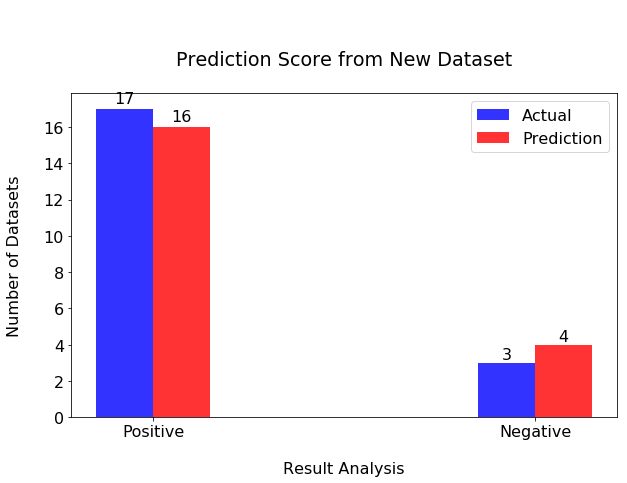

In [15]:
import sys,csv,re
import matplotlib.pyplot as plt
import pylab as plb
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

pd.set_option('display.notebook_repr_html', True)

class Prediction:

    def MainProcess(self):
        
        
        #  TRAINING FROM WHOLE DATASETS ########################################################################## 
        
        df = pd.DataFrame()
        df = pd.read_csv('car_resample.csv')
        
        stopset = set(stopwords.words('english'))
        vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)
        
        y = df.Polarity_Class
        X = vectorizer.fit_transform(df.Tweet)
        clf = naive_bayes.MultinomialNB()
        clf.fit(X, y)
        
        # PREDICTION #############################################################################################
        
        
        df_new = pd.DataFrame()
        
        temp = str(input("\nEnter the file name of new dataset : "))
        df_new = pd.read_csv(temp)
        
        data = vectorizer.transform(df_new.Tweet)
        pred = clf.predict(data)
        
        df_result = pd.DataFrame()
        df_result['Tweet'] = df_new.Tweet
        df_result['Prediction'] = pred
        df_result['Actual'] = df_new.Polarity_Class
        
        display (df_result)
        
        actual_pos = df_result.loc[df_result['Actual'] == 'Positive']
        actual_neg = df_result.loc[df_result['Actual'] == 'Negative']
        pred_pos = df_result.loc[df_result['Prediction'] == 'Positive']
        pred_neg = df_result.loc[df_result['Prediction'] == 'Negative']
        
        total_actual_pos = len(actual_pos)
        total_actual_neg = len(actual_neg)
        total_pred_pos = len(pred_pos)
        total_pred_neg = len(pred_neg)
        
        print ('\n\nResults :')
        print ('\nTotal Actual Positive :' +str(total_actual_pos))
        print ('Total Predicted Positive :' +str(total_pred_pos))
        print ('\nTotal Actual Negative :' +str(total_actual_neg))
        print ('Total Predicted Negative :' +str(total_pred_neg))
        
        # VISUALIZE #############################################################################################
        
        n_groups = 2
        act_bar = (total_actual_pos,total_actual_neg)
        pred_bar = (total_pred_pos, total_pred_neg)

        # create plot
        index = np.arange(n_groups)
        bar_width = 0.15
        opacity = 0.8
        plt.figure(figsize=(9,7))
        #plb.rcParams['font.size'] = 16

        rects1 = plt.bar(index, act_bar, bar_width,alpha=opacity,color='b',align='edge',label='Actual')
        rects2 = plt.bar(index + bar_width, pred_bar, bar_width,alpha=opacity,color='r',align='edge',label='Prediction')

        plt.xlabel('\nResult Analysis')
        plt.ylabel('Number of Datasets\n')
        plt.title('\n\nPrediction Score from New Dataset\n')
        plt.xticks(index + bar_width, ('Positive', 'Negative'))
        plt.legend()
        plt.tight_layout()
        
        self.autolabel(rects1)
        self.autolabel(rects2)
        
        plt.show()
        
    def autolabel(self,rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                    '%d' % int(height),
                    ha='center', va='bottom')
        
        
if __name__== "__main__":
    sa = Prediction()
    sa.MainProcess() 